In [5]:
from math import cos, sin

def fx(t, xvn, yvn, a):
    return a*(cos(t) ** 2 * sin(t) + 2*cos(t) - (2 + xvn * yvn)*xvn) - yvn

def fy(t, xvn, yvn, a):
    return xvn + yvn - sin(t)

def fx2(t):
    return cos(t)

def fy2(t):
    return sin(t)

In [6]:
from scipy import optimize
"""Неявный метод Эйлера 1-го порядка"""
def implicit2_method(T, xvn, yvn, t, ak):
    a = [[0, 0],
         [1/2, 1/2]]
    c = [1/2]
    b = [1/2, 1/2]
    
    k1 = [T * fx(t, xvn, yvn, ak), T * fy(t, xvn, yvn, ak)]
    #0 0 0
    #1 1/2 1/2
    #0 1/2 1/2
    # kx1
    def fk(x):
        # x = k2
        xn = [xvn + a[1][0] * k1[0] + a[1][1] * x[0], xvn + a[1][0] * k1[0] + a[1][1] * x[0]]
        yn = [yvn + a[1][0] * k1[1] + a[1][1] * x[1], yvn + a[1][0] * k1[1] + a[1][1] * x[1]]
        return [T * fx(t + c[0] * T, xn[0], yn[0], ak) - x[0],
              T * fy(t + c[0] * T, xn[1], yn[1], ak) - x[1],]

    # -a(2xvn + xvn ** 2 * yvn) - yvn
    def jac_fk(x):        
        xn = [xvn + a[1][0] * k1[0] + a[1][1] * x[0], xvn + a[1][0] * k1[0] + a[1][1] * x[0]]
        yn = [yvn + a[1][0] * k1[1] + a[1][1] * x[1], yvn + a[1][0] * k1[1] + a[1][1] * x[1]]
        return [[-ak * (2 * xn[0] * yn[0] * a[1][1] + 2 * a[1][1]) * T - 1, (-ak * xn[0] * xn[0] - 1 * a[1][1]) * T],
                [T * 1 * a[1][1], T * 1 * a[1][1] - 1]]

    sol = optimize.root(fun=fk, x0=[T * fx(t, xvn, yvn, ak), T * fy(t, xvn, yvn, ak)],
                    jac=jac_fk, method='hybr')
    xn2 = xvn + b[0] * k1[0] + b[1] * sol.x[0]
    yn2 = yvn + b[0] * k1[1] + b[1] * sol.x[1]
    return (xn2, yn2)

In [7]:
# неявный 1
def jac2(T, xvn, yvn, t, ak):
  def jac_f(x):
      return [[-ak * (x[0] * x[1] + 2) * T - 1, (-ak * x[0] * x[0] - 1) * T],
              [T * 1, T * 1 - 1]]
  return jac_f

C:\Users\coconut\AppData\Local\Temp\ipykernel_10332\4077056511.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


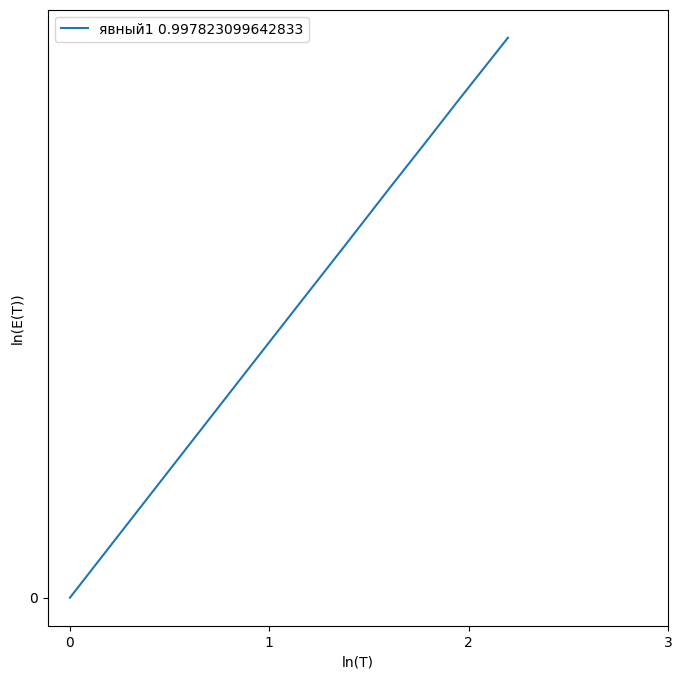

In [8]:
import math
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
from num_methods import Solver2
from drawing import draw

def f(T):
    t_start = 0
    t_finish = 2.5
    a = 10
    
    lst =  (fx2(t), fy2(t))
    sol = Solver2((fx, fy), [a], lst, (t_start, t_finish))
    # array1 = do_method(explicit_method, t_start, t_finish, [lst], variables, False)
    # array1 = do_method(implicit_method, t_start, t_finish, [lst], variables, False)
    array1 = sol.do_method(sol.implicit1, T, jac2)
    array2 = sol.do_method(sol.implicit1, T, jac2)
    # array2 = sol.do_method(explicit4_method, t_start, t_finish, [lst], variables, False)
    array3 = sol.do_method(sol.explicit5, T)
    # array3 = do_method(explicit4_method, t_start, t_finish, [lst], variables, False)
    # array3 = do_method(implicit_method, t_start, t_finish, [lst], variables, False)
    arrayx1 = sol.get_x(array1)
    arrayy1 = sol.get_y(array1)
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    arrayx3 = [i[0] for i in array3[1]]
    arrayy3 = [i[1] for i in array3[1]]
    # arrayx4 = [i[0] for i in array3[1]]
    # arrayy4 = [i[1] for i in array3[1]]
    # print(len(array1[0]), len(array2[0]), len(array3[0]))
    max_dif = [0, 0, 0]
    tl = array1[0]
    for i in range(len(array1[0])):
        real_x = fx2(tl[i])
        real_y = fy2(tl[i])
        max_dif[0] = max(max_dif[0], abs(arrayx1[i] - real_x))
        max_dif[0] = max(max_dif[0], abs(arrayy1[i] - real_y))
        max_dif[1] = max(max_dif[1], abs(arrayx2[i] - real_x))
        max_dif[1] = max(max_dif[1], abs(arrayy2[i] - real_y))
        max_dif[2] = max(max_dif[2], abs(arrayx3[i] - real_x))
        max_dif[2] = max(max_dif[2], abs(arrayy3[i] - real_y))

    # CHECK
    # args = np.linspace(t_start, t_finish, 500)
    # x_true = list([fx2(t) for t in args])
    # print(arrayx1)
    # print(x_true)
    # draw([array1[0], args], [arrayx1, x_true], ['fake', 'real'])
    # return 

    return max_dif

t_l = list()
diff_l1 = list()
diff_l2 = list()
diff_l3 = list()

t = 0.001
dif = f(t)
crd_move_x = math.log(t)
crd_move_y1 = math.log(dif[0])
crd_move_y2 = math.log(dif[1])
crd_move_y3 = math.log(dif[2])
T = 0.01
while t <= T:
    # print(t, end=" ")
    dif = f(t)
    # break
    # print(t, dif[2])
    diff_l1.append(math.log(dif[0]) - crd_move_y1)
    diff_l2.append(math.log(dif[1]) - crd_move_y2)
    diff_l3.append(math.log(dif[2]) - crd_move_y3)
    t_l.append(math.log(t) - crd_move_x)
    t += 0.001
    # TODO:
    # break

fig = plt.figure(figsize=(8,8))
px1 = fig.add_subplot(111)
px1.plot(t_l, diff_l1, label="явный1" + f" {mean(diff_l1[i]/t_l[i] for i in range(1, len(t_l)))}")
px1.set_xticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_yticks(np.arange(0, math.ceil(math.log(T) - crd_move_y1) + 1, step=1))
px1.set_xlabel("ln(T)")
px1.set_ylabel("ln(E(T))")
px1.legend()
fig.show()

    